# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Using Antithetic on the integrand we can improve the variance of the estimation, this can be done because in this interval $\cos(x)$ is quasi linear.
In this way the integrand also became symmetric in $x = 1/2$, in this case we can use importance sampling using a taylor expansion of the integrand.

So using a new integrand:
$$
    h(x) = \frac{1}{2} \left(g(x) + g(1-x)\right) = \frac{\pi}{2\sqrt{2}} \cos{\left(\frac{\pi}{2}\left(x - \frac{1}{2}\right)\right)}
$$

The taylor expansion gives:
$$
    p(x) = \frac{\pi}{2\sqrt{2}}\left( 1 - \frac{\pi^2}{8}\left(x - \frac{1}{2}\right)^2\right)
$$

Which is locally invertible, but cannot be inverted globally, but we have accept reject, so it is a non problem.

Normalizing $p(x)$ produces:
$$
    p_n(x) = \frac{(1 - \frac{\pi^2}{8}\left(x - \frac{1}{2}\right)^2)}{1 - \frac{\pi^2}{96}}
$$


In [1]:
# First Point
import matplotlib.pyplot as plt
import numpy as np
from seaborn import set_style

<ErrorbarContainer object of 3 artists>

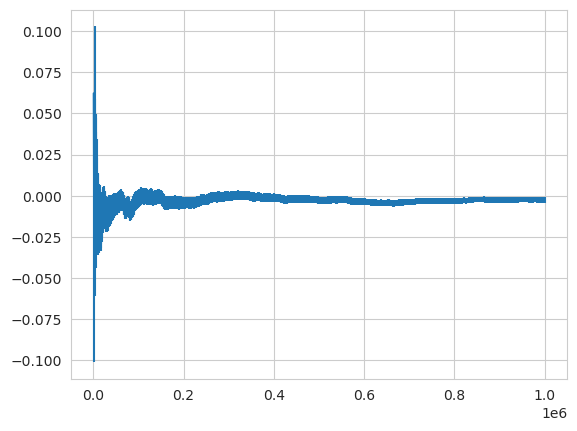

In [2]:
set_style("whitegrid")

data_unif = np.loadtxt("eser_2/2_1/uniform.csv", delimiter = ',')
x = np.arange(1 , 1+data_unif.shape[0]) * 1000
plt.errorbar(x, data_unif[:,0] -1, data_unif[:,1])

<ErrorbarContainer object of 3 artists>

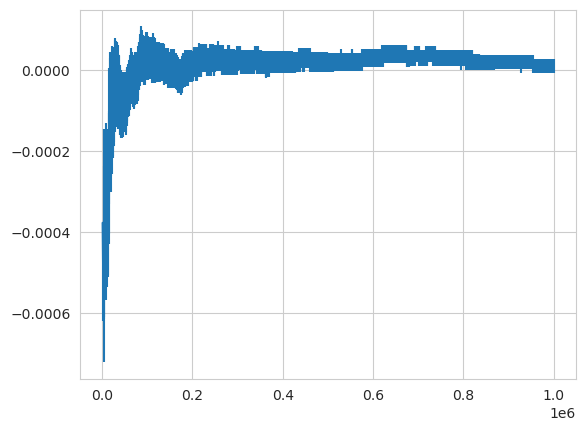

In [3]:
# second point
data_precise = np.loadtxt("eser_2/2_1/precise.csv", delimiter = ',')
x = np.arange(1 , 1+data_unif.shape[0]) * 1000
plt.errorbar(x, data_precise[:,0] -1, data_precise[:,1])

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

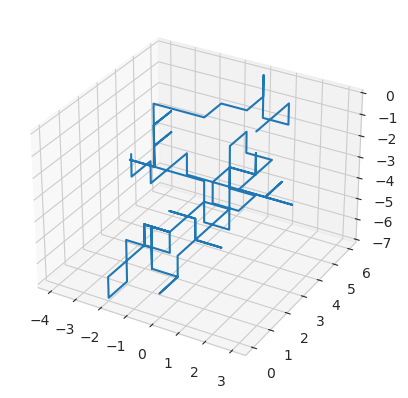

In [16]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')

data_lattice = np.loadtxt('eser_2/2_2/random_walk_lattice.csv',delimiter = ',', skiprows=1)

ax.plot(data_lattice[:,0], data_lattice[:,1], data_lattice[:,2])

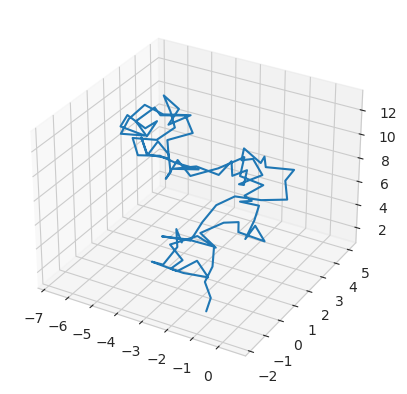

In [18]:
ax = plt.figure().add_subplot(projection='3d')

data_continuos = np.loadtxt('eser_2/2_2/random_walk_continuos.csv',delimiter = ',', skiprows=1)

ax.plot(data_continuos[:,0], data_continuos[:,1], data_continuos[:,2])